In [0]:
import tensorflow as tf

# Let's import the mnist dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [48]:
print('Size of each image: '+str(train_images[1].shape))
print('Size of the training dataset: '+str(train_images.shape[0]))
print('Size of the testing dataset: '+str(test_images.shape[0]))
print('')

print('Shape of the training dataset: '+str(train_images.shape))
print('Shape of the training labels: '+str(train_labels.shape))

print('Shape of the testing dataset: '+str(test_images.shape))
print('Shape of the testing labels: '+str(test_labels.shape))

Size of each image: (28, 28)
Size of the training dataset: 60000
Size of the testing dataset: 10000

Shape of the training dataset: (60000, 28, 28)
Shape of the training labels: (60000,)
Shape of the testing dataset: (10000, 28, 28)
Shape of the testing labels: (10000,)


# Now, let's define a model

In [0]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(75, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(75, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(20, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


**Then, we've got to define how the model compiles**

In [86]:
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='auto')

# categorical_crossentropy -> cost/loss function
# optimizer can also be adam

# Now, let's train the model that we've defined

In [87]:
model1.fit(train_images, train_labels, epochs=40)

Epoch 1/40
60000/60000 [==============================] - 5s 82us/step - loss: 6.0254 - acc: 0.6176
Epoch 2/40
60000/60000 [==============================] - 4s 65us/step - loss: 4.7306 - acc: 0.7023
Epoch 3/40
60000/60000 [==============================] - 4s 65us/step - loss: 4.5460 - acc: 0.7153
Epoch 4/40
60000/60000 [==============================] - 4s 65us/step - loss: 4.5379 - acc: 0.7165
Epoch 5/40
60000/60000 [==============================] - 4s 65us/step - loss: 4.4256 - acc: 0.7237
Epoch 6/40
60000/60000 [==============================] - 4s 68us/step - loss: 4.3549 - acc: 0.7285
Epoch 7/40
60000/60000 [==============================] - 4s 70us/step - loss: 4.3278 - acc: 0.7303
Epoch 8/40
60000/60000 [==============================] - 4s 69us/step - loss: 4.3231 - acc: 0.7308
Epoch 9/40
60000/60000 [==============================] - 4s 69us/step - loss: 4.3424 - acc: 0.7294
Epoch 10/40
60000/60000 [==============================] - 4s 69us/step - loss: 4.2614 - acc: 0.7348

# Then, we evaluate the model that we've just trained

In [72]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels)
train_loss, train_accuracy = model1.evaluate(train_images, train_labels)

print('Accuracy on the test set: '+str(test_accuracy))
print('Accuracy on the train set: '+str(train_accuracy))

60000/60000 [==============================] - 2s 29us/step
Accuracy on the test set: 0.9643
Accuracy on the train set: 0.9907


In [0]:
predictions = model1.predict(test_images)

Predictions: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


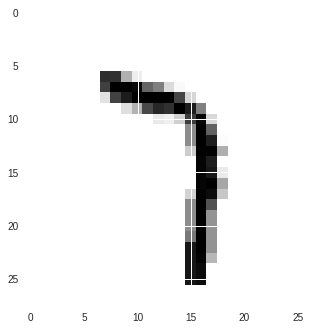

In [90]:
toShow = 122

print('Predictions: '+str(predictions[toShow]))

import pandas as pd
import matplotlib.pyplot as plt

plt.imshow(test_images[toShow], cmap='binary')